**Import dependancies**

In [1]:
import pandas
import numpy
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree, metrics
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

**Import the dataset**

In [2]:
dataSet = pandas.read_csv("z-AssignmentTrainingData100-JamieComplex.csv")
#print(dataSet)

**Convert non-numerical fields to numerical values**

In [3]:
convert = {True: 1, False: 0}
dataSet['SuccessTF'] = dataSet['SuccessTF'].map(convert)
#print(dataSet)

**Divide the data into features (Attributes), and output (labels)**

In [4]:
features = ['OvertakingSpeedMPS', 'OncomingSpeedMPS', 'InitialSeparationM']
input = dataSet[features]
output = dataSet['SuccessTF']
#print(input)
#print(output)

**SKLEARN has the ability to automtically split dataset into training and testing data**

In [5]:
from sklearn.model_selection import train_test_split
input_train, input_test, output_train, output_test = train_test_split(input, output, test_size=0.2, random_state=0)

**SKLEARN has an ability to scale values so they look nicer on any graphs**

In [6]:
sc = StandardScaler()
input_train = sc.fit_transform(input_train)
input_test = sc.transform(input_test)

**Now create the random forest and train the model**
<br>Estimators are the number of trees in the forest.

In [7]:
rForest = RandomForestRegressor(n_estimators=250, random_state=0)
rForest.fit(input_train, output_train)

RandomForestRegressor(n_estimators=250, random_state=0)

**Use the model to test predict new things**

**Round the result in case its not a whole number before convert to normal text**
<br>`def` is short for definition - it is the python way of defining a method/function

In [8]:
outcome = rForest.predict(input_test)

def round_half_up(n, decimals=0):
    multiplier = 10 ** decimals
    return numpy.floor(n*multiplier + 0.5) / multiplier

outcome = round_half_up(outcome, decimals=0)

print('Predicted Output: ', outcome)
print('Expected Output:  ', output_test.to_list())

Predicted Output:  [1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 0. 1.]
Expected Output:   [1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1]


**Evaluate how good the algorithm is:**
<br>You can use different metrics to evaluate an algorithm:
- mean absolute error (expect to be within 10% of range of values)
- root mean squared error (expect to be within 10% of average)


Mean Absolute Error: 0.0
Root Mean Squared Error: 0.0
F1 Score: 1.0


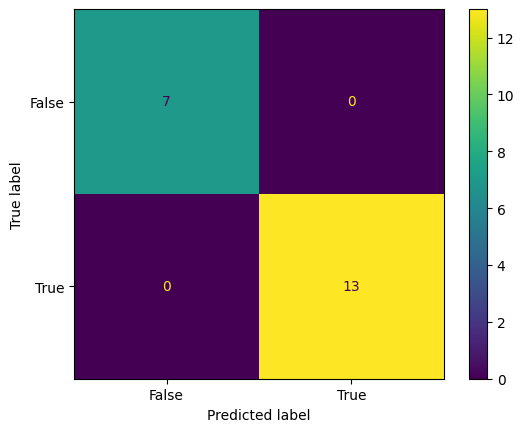

In [9]:
mae = metrics.mean_absolute_error(output_test, outcome)
print('Mean Absolute Error:', mae)
maeCheck = (max(output_test)-min(output_test))*0.1
if mae > maeCheck:
    print('\033[91m'+'MAE indicates your algorithm needs improving'+'\033[0m')

evalValue = numpy.sqrt(metrics.mean_squared_error(output_test, outcome))
print('Root Mean Squared Error:', evalValue)
avgOutput = numpy.average(output)
if evalValue > avgOutput*0.1:
    print('\033[91m'+'RSME indicates your algorithm needs improving'+'\033[0m')

f1 = metrics.f1_score(output_test, outcome)
print('F1 Score:', f1)
f1Check = 0.9
if f1 < f1Check:
    print('\033[91m'+'F1 Score indicates your algorithm needs improving'+'\033[0m')

confusion_matrix = metrics.confusion_matrix(output_test, outcome)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

**Now finally use the model to predict an actual result**
<br>Set your prediction data, you can do it manually or use a dataframe to avoid user warnings

In [10]:
predictData = pandas.DataFrame(columns=features, index=[0])
predictData.loc[0] = pandas.Series({'OvertakingSpeedMPS': 31.6, 'OncomingSpeedMPS': 20.8, 'InitialSeparationM': 157.6})

outcome = rForest.predict(predictData)
outcome = round_half_up(outcome, decimals=0)
print(outcome)

[0.]


c:\Program Files (x86)\EasyPHP-Devserver-17\eds-www\mod005444-p110136416-ele010\.venv\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


**Now convert to text and give an output**

In [11]:
if outcome == 0:
    print('\033[91m'+'\033[1m'+'I recommend you DO NOT overtake.'+'\033[0m')
elif outcome == 1:
    print('\033[92m'+'\033[1m'+'You can safely overtake.'+'\033[0m')
else:
    print('\033[96m'+'\033[1m'+'The outcome is unknown. Proceed at your own risk.'+'\033[0m')

I recommend you DO NOT overtake.
